# # Importing the header files


In [11]:
import pandas as pd
import boto3
import io

## Reading Datasets from S3 Bucket

In [2]:
list1 = []

for i in range(1,4):
    file_key = 'cancer'+str(i)+'.csv'

    s3_client = boto3.client('s3')

    obj = s3_client.get_object(Bucket='aws-cancer', Key=file_key)

    df = pd.read_csv(io.BytesIO(obj['Body'].read()))

    list1.append(df)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


## Joining all dataframe into one

In [3]:
df=pd.concat(list1, ignore_index=True, sort=False)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,...,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,NaN
1,862965,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,...,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,NaN
2,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,...,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,NaN
3,862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,23.31,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552,NaN
4,863030,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,...,22.40,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050,NaN


In [5]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
364,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
365,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
366,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
367,862548,M,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353
368,862717,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,...,16.99,35.27,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397


In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,2.814515e+07,13.991358,19.468320,91.148997,640.772900,0.097638,0.107283,0.090576,0.049562,0.182233,...,16.150398,26.010298,106.546260,864.407046,0.134236,0.263035,0.280926,0.116480,0.292149,0.085403
std,1.242867e+08,3.438319,4.212879,23.756873,337.949579,0.014315,0.053831,0.079905,0.038286,0.028151,...,4.677335,5.972286,32.776647,541.575287,0.022614,0.164252,0.212981,0.065344,0.065391,0.019171
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.629650e+05,11.680000,16.390000,75.270000,416.200000,0.087520,0.066980,0.032110,0.021790,0.162800,...,13.050000,21.580000,84.460000,516.500000,0.119300,0.155000,0.125600,0.068450,0.248000,0.072470
50%,9.079150e+05,13.370000,19.400000,86.600000,551.100000,0.097400,0.096610,0.063350,0.034830,0.179800,...,15.110000,25.840000,99.000000,701.900000,0.133800,0.217000,0.239000,0.102500,0.282700,0.080750
75%,8.510653e+06,15.500000,21.940000,102.700000,748.900000,0.106800,0.131300,0.131900,0.074000,0.196600,...,18.230000,30.410000,123.800000,1030.000000,0.147800,0.351100,0.386500,0.161400,0.319600,0.092880
max,9.113205e+08,27.420000,30.720000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,42.790000,251.200000,4254.000000,0.209800,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       369 non-null    int64  
 1   diagnosis                369 non-null    object 
 2   radius_mean              369 non-null    float64
 3   texture_mean             369 non-null    float64
 4   perimeter_mean           369 non-null    float64
 5   area_mean                369 non-null    float64
 6   smoothness_mean          369 non-null    float64
 7   compactness_mean         369 non-null    float64
 8   concavity_mean           369 non-null    float64
 9   concave points_mean      369 non-null    float64
 10  symmetry_mean            369 non-null    float64
 11  fractal_dimension_mean   369 non-null    float64
 12  radius_se                369 non-null    float64
 13  texture_se               369 non-null    float64
 14  perimeter_se             3

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
s={'M':1,'B':0}
df['diagnosis']=df['diagnosis'].map(s)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,862722,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
1,862965,0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878
2,862980,0,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,...,10.76,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
3,862989,0,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,...,11.54,23.31,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552
4,863030,1,13.110,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,...,16.31,22.40,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
365,862261,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
366,862485,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
367,862548,1,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353


##  Achieving parallelism by using Sagemaker Libraries 

In [ ]:
import sagemaker
import boto3
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

import numpy as np  
import os
from time import gmtime, strftime

region = boto3.Session().region_name
smclient = boto3.Session().client("sagemaker")

role = sagemaker.get_execution_role()

bucket = 'aws-cancer'
prefix = 'sagemaker/data'

## Spliting Dataset  test,train,validation

In [ ]:
train_data, validation_data, test_data = np.split(data.sample(frac=1, random_state=1729),
                                                  [int(0.7 * len(data)), int(0.9 * len(data))])

## Uploading dataset to S3 Bucket

In [ ]:
train_data.to_csv("train.csv", index=False, header=False)
validation_data.to_csv("validation.csv", index=False, header=False)
test_data.to_csv("test.csv", index=False, header=False)

In [ ]:
boto3.Session().resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train/train.csv")).upload_file("train.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(os.path.join(prefix, "validation/validation.csv")).upload_file("validation.csv")

## Input for SageMaker

In [ ]:
from sagemaker.inputs import TrainingInput

s3_input_train = TrainingInput(
    s3_data="s3://{}/{}/train".format(bucket, prefix), content_type="csv"
)

s3_input_validation = TrainingInput(
    s3_data="s3://{}/{}/validation".format(bucket, prefix), content_type="csv"
)

## Setting Up Hyperparameter Tuning Job

In [ ]:
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.image_uris import retrieve

sess = sagemaker.Session()

container = retrieve("xgboost", region, "latest")

xgb = sagemaker.estimator.Estimator(
    container,
    role,
    base_job_name="xgboost-random-search",
    instance_count=1,
    instance_type="ml.m4.xlarge",
    output_path="s3://{}/{}/output".format(bucket, prefix),
    sagemaker_session=sess,
)

xgb.set_hyperparameters(
    eval_metric="auc",
    objective="binary:logistic",
    num_round=10,
    rate_drop=0.3,
    tweedie_variance_power=1.4,
)
objective_metric_name = "validation:auc"

### Random Search with Logarithmic Scaling

In [ ]:
hyperparameter_ranges = {
    "alpha": ContinuousParameter(0.01, 10, scaling_type="Logarithmic"),
    "lambda": ContinuousParameter(0.01, 10, scaling_type="Logarithmic"),
}

In [ ]:
tuner_log = HyperparameterTuner(
    xgb,
    objective_metric_name,
    hyperparameter_ranges,
    max_jobs=5,
    max_parallel_jobs=5,
    strategy="Random",
)

tuner_log.fit(
    {"train": s3_input_train, "validation": s3_input_validation},
    include_cls_metadata=False,
    job_name="xgb-randsearch-" + strftime("%Y%m%d-%H-%M-%S", gmtime()),
)

......................................................!


In [ ]:
boto3.client("sagemaker").describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner_log.latest_tuning_job.job_name
)["HyperParameterTuningJobStatus"]

'Completed'

### Random Search with Linear Scaling

In [ ]:
hyperparameter_ranges_linear = {
    "alpha": ContinuousParameter(0.01, 10, scaling_type="Linear"),
    "lambda": ContinuousParameter(0.01, 10, scaling_type="Linear"),
}

In [ ]:
tuner_linear = HyperparameterTuner(
    xgb,
    objective_metric_name,
    hyperparameter_ranges_linear,
    max_jobs=5,
    max_parallel_jobs=5,
    strategy="Random",
)

tuner_linear.fit(
    {"train": s3_input_train, "validation": s3_input_validation},
    include_cls_metadata=False,
    job_name="xgb-linsearch-" + strftime("%Y%m%d-%H-%M-%S", gmtime()),
)

...............................................................!


In [ ]:
boto3.client("sagemaker").describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner_linear.latest_tuning_job.job_name
)["HyperParameterTuningJobStatus"]

'Completed'

## Comparing Model Performances

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# check jobs have finished
status_log = boto3.client("sagemaker").describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner_log.latest_tuning_job.job_name
)["HyperParameterTuningJobStatus"]
status_linear = boto3.client("sagemaker").describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner_linear.latest_tuning_job.job_name
)["HyperParameterTuningJobStatus"]

assert status_log == "Completed", "First must be completed, was {}".format(status_log)
assert status_linear == "Completed", "Second must be completed, was {}".format(status_linear)

df_log = sagemaker.HyperparameterTuningJobAnalytics(
    tuner_log.latest_tuning_job.job_name
).dataframe()
df_linear = sagemaker.HyperparameterTuningJobAnalytics(
    tuner_linear.latest_tuning_job.job_name
).dataframe()
df_log["scaling"] = "log"
df_linear["scaling"] = "linear"
df = pd.concat([df_log, df_linear], ignore_index=True)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


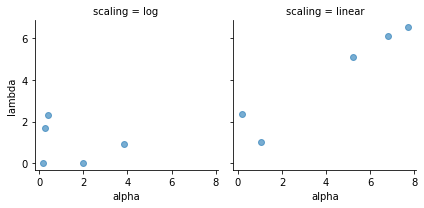

In [ ]:
g = sns.FacetGrid(df, col="scaling", palette="viridis")
g = g.map(plt.scatter, "alpha", "lambda", alpha=0.6)

## Deploying Best Model - Linear Scaling

In [ ]:
predictor = tuner_linear.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")


2022-06-12 14:08:36 Starting - Preparing the instances for training
2022-06-12 14:08:36 Downloading - Downloading input data
2022-06-12 14:08:36 Training - Training image download completed. Training in progress.
2022-06-12 14:08:36 Uploading - Uploading generated training model
2022-06-12 14:08:36 Completed - Training job completed
-------!